# Proyek Analisis Data: PRSA_Data_Gucheng
- **Nama:** Moch Abdul Aziz
- **Email:** mochaziz290@gmail.com
- **ID Dicoding:** MS058D5Y0508

## Menentukan Pertanyaan Bisnis


- Apakah ada hubungan antara kualitas udara dan cuaca?

- Bagaimana kualitas udara berubah setelah hujan?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from google.colab import drive

## Data Wrangling

### Gathering Data

In [5]:
drive.mount('/content/drive')


file_path = "/content/drive/My Drive/Colab Notebooks/PRSA_Data_Gucheng_20130301-20170228.csv"

data_gucheng = pd.read_csv(file_path)
data_gucheng.head()

Mounted at /content/drive


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


**Insight:**
- Memuat file dari goofle drive agar tidak hilang saat diconnect / sesi selesai

### Assessing Data

In [6]:
data_gucheng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
data_gucheng.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,646
PM10,381
SO2,507
NO2,668
CO,1401


In [8]:
print("Jumlah duplikasi: ", data_gucheng.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
data_gucheng.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


**Insight:**
- Terdapat tipe data int64, float64 dan object
- 0 Duplikasi
- Terdapat beberapa data yang kosong

### Cleaning Data

Membersihkan Tabel


In [10]:
data_gucheng.duplicated().sum()

0

In [11]:
data_gucheng.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,646
PM10,381
SO2,507
NO2,668
CO,1401


In [12]:
data_gucheng[data_gucheng['CO'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3,4,2013,3,1,3,6.0,20.0,6.0000,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
99,100,2013,3,5,3,122.0,157.0,53.0000,70.0000,NaN,107.0,0.6,1012.0,-7.9,0.0,WNW,0.1,Gucheng
111,112,2013,3,5,15,133.0,137.0,66.0000,NaN,NaN,107.0,14.4,1005.2,-7.7,0.0,E,0.6,Gucheng
136,137,2013,3,6,16,162.0,288.0,155.0000,153.0000,NaN,20.0,14.1,1003.4,-3.7,0.0,WSW,1.2,Gucheng
178,179,2013,3,8,10,266.0,329.0,83.1096,179.2269,NaN,107.0,19.2,998.8,-3.1,0.0,SW,1.7,Gucheng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34914,34915,2017,2,22,18,NaN,NaN,NaN,NaN,NaN,NaN,5.6,1015.1,-14.0,0.0,NNW,5.5,Gucheng
34934,34935,2017,2,23,14,21.0,49.0,NaN,20.0000,NaN,70.0,8.2,1019.2,-12.9,0.0,SSW,2.1,Gucheng
34935,34936,2017,2,23,15,29.0,34.0,NaN,16.0000,NaN,NaN,7.8,1018.6,-13.2,0.0,S,3.4,Gucheng
34936,34937,2017,2,23,16,30.0,57.0,NaN,NaN,NaN,69.0,7.6,1018.4,-12.8,0.0,SSW,3.2,Gucheng


Menghapus 1 baris data jika terdapat 10 data yang kosong

In [13]:
data_gucheng = data_gucheng.dropna(thresh=10)

In [14]:
data_gucheng.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,646
PM10,381
SO2,507
NO2,668
CO,1401


Mengisi data yang kosong menggunakan median

In [17]:
num_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
data_gucheng[num_cols] = data_gucheng[num_cols].fillna(data_gucheng[num_cols].median())

In [19]:
data_gucheng['wd'] = data_gucheng['wd'].fillna(data_gucheng['wd'].mode()[0])

In [36]:
data_gucheng.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [21]:
data_gucheng.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.412651,118.646161,15.245193,55.759226,1307.034309,57.430945,13.865885,1008.829122,2.611008,0.064374,1.342899
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.092868,96.237612,21.074340,36.133665,1187.465580,56.452790,11.284697,10.096057,13.772971,0.838142,1.150436
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,25.000000,46.000000,2.000000,26.000000,600.000000,10.000000,3.700000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,166.000000,19.000000,78.000000,1600.000000,82.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


**Insight:**
- Tidak ada data yang terduplikasi. Namun terdapat beberapa data yang kosong lalu saya mengisi dengan beberapa metode umum


## Exploratory Data Analysis (EDA)

### Explore ...

In [25]:
data_gucheng[data_gucheng.hour == data_gucheng.hour.min()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,50.0,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
24,25,2013,3,2,0,14.0,18.0,24.0,43.0,1399.0,25.0,-0.3,1028.9,-18.0,0.0,ENE,1.4,Gucheng
48,49,2013,3,3,0,81.0,108.0,64.0,91.0,2500.0,4.0,-2.5,1018.4,-11.0,0.0,WNW,0.5,Gucheng
72,73,2013,3,4,0,28.0,59.0,23.0,18.0,1600.0,47.0,10.1,1013.6,-11.9,0.0,NNE,3.5,Gucheng
96,97,2013,3,5,0,99.0,156.0,83.0,85.0,2100.0,107.0,5.7,1013.3,-9.7,0.0,W,0.9,Gucheng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34944,34945,2017,2,24,0,46.0,90.0,14.0,50.0,1700.0,4.0,0.3,1018.6,-9.7,0.0,SW,1.4,Gucheng
34968,34969,2017,2,25,0,8.0,22.0,7.0,16.0,500.0,44.0,6.1,1017.5,-13.5,0.0,WNW,2.5,Gucheng
34992,34993,2017,2,26,0,13.0,33.0,9.0,43.0,800.0,31.0,4.2,1017.0,-9.6,0.0,SSE,0.8,Gucheng
35016,35017,2017,2,27,0,53.0,130.0,11.0,75.0,1300.0,4.0,1.8,1016.5,-7.3,0.0,N,0.5,Gucheng


In [26]:
data_gucheng.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
27095,27096,2016,4,2,23,6.0,33.0,2.0,10.0,200.0,76.0,13.8,1016.5,-15.2,0.0,N,3.3,Gucheng
14162,14163,2014,10,12,2,5.0,5.0,2.0,10.0,200.0,50.0,15.7,1020.8,3.5,0.0,ENE,1.9,Gucheng
34409,34410,2017,2,1,17,48.0,77.0,18.0,24.0,900.0,56.0,2.2,1028.3,-22.6,0.0,SSW,2.6,Gucheng
21203,21204,2015,8,1,11,52.0,52.0,2.0,26.0,1100.0,93.0,26.3,1000.3,22.4,0.0,WSW,1.2,Gucheng
24238,24239,2015,12,5,22,179.0,289.0,52.0,104.0,4200.0,2.0,-0.1,1023.3,-5.5,0.0,S,0.6,Gucheng
28968,28969,2016,6,20,0,157.0,340.0,3.0,56.0,1400.0,138.0,26.9,995.5,21.2,0.0,SW,1.0,Gucheng
30331,30332,2016,8,15,19,17.0,39.0,2.0,23.0,400.0,77.0,24.8,999.3,16.5,0.0,SSW,1.6,Gucheng
30670,30671,2016,8,29,22,58.0,245.0,2.0,138.0,900.0,10.0,23.5,1003.6,13.9,0.0,SW,0.9,Gucheng
6506,6507,2013,11,27,2,6.0,39.0,8.0,6.0,1300.0,47.0,-2.3,1017.2,-21.7,0.0,W,4.8,Gucheng
10998,10999,2014,6,2,6,17.0,33.0,2.0,22.0,400.0,117.0,19.8,1005.2,15.4,0.0,N,0.8,Gucheng


In [27]:
data_gucheng.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4108,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.412651,118.646161,15.245193,55.759226,1307.034309,57.430945,13.865885,1008.829122,2.611008,0.064374,NaN,1.342899,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.092868,96.237612,21.074340,36.133665,1187.465580,56.452790,11.284697,10.096057,13.772971,0.838142,NaN,1.150436,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,25.000000,46.000000,2.000000,26.000000,600.000000,10.000000,3.700000,1000.500000,-8.900000,0.000000,NaN,0.600000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,NaN,1.000000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,166.000000,19.000000,78.000000,1600.000000,82.000000,23.500000,1017.000000,15.300000,0.000000,NaN,1.800000,NaN


In [31]:
data_gucheng["No"].is_unique

True

**Insight:**
- No bersifat uniq / tidak ada yang terduplikasi

## Visualization & Explanatory Analysis

### Pertanyaan 1:

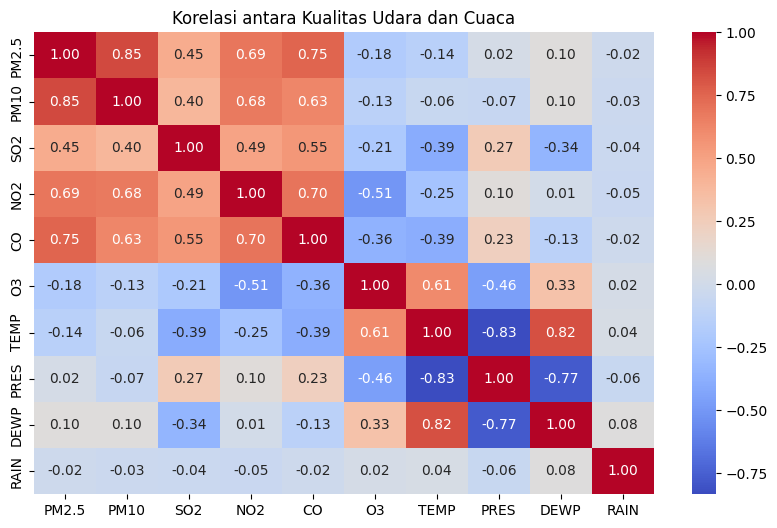

In [32]:
cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN"]

correlation_matrix = data_gucheng[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antara Kualitas Udara dan Cuaca")
plt.show()

### Pertanyaan 2:

In [33]:
data_gucheng["rain_status"] = data_gucheng["RAIN"].apply(lambda x: "Hujan" if x > 0 else "Tidak Hujan")

data_gucheng.groupby("rain_status")["PM2.5"].mean()

,PM2.5
rain_status,
Hujan,63.277448
Tidak Hujan,84.217677


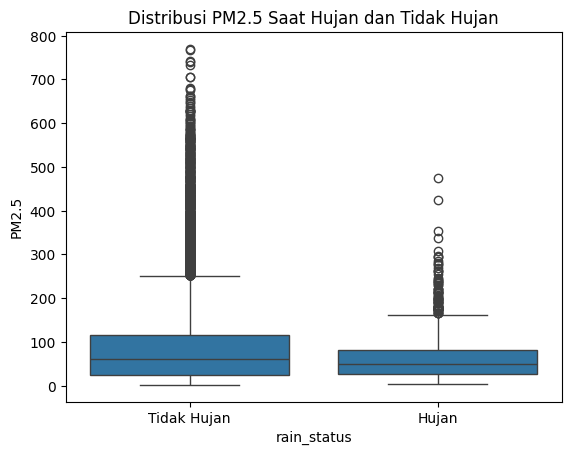

In [35]:
sns.boxplot(x="rain_status", y="PM2.5", data=data_gucheng)
plt.title("Distribusi PM2.5 Saat Hujan dan Tidak Hujan")
plt.show()

**Insight:**
- Dari visualisasi pertanyaan 1 dapat saya simpulkn bahwa Polutan udara seperti PM2.5, PM10, CO, dan NO2 memiliki korelasi kuat, yang menunjukkan bahwa mereka sering berasal dari sumber yang sama, seperti emisi kendaraan dan industri.

- Dari visualisasi pertanyaan 2 PM2.5 lebih rendah saat hujan dibandingkan saat tidak hujan, yang mengindikasikan bahwa hujan dapat membantu membersihkan udara dari partikel polutan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Kualitas udara dan cuaca memiliki hubungan yang saling memengaruhi satu sama lain. Cuaca seperti suhu, kelembaban, angin, dan curah hujan dapat memengaruhi konsentrasi dan penyebaran polutan di udara. Sementara itu, kualitas udara yang buruk akibat polusi dapat memperburuk perubahan iklim dan cuaca ekstrem.

- Berdasarkan Boxplot di atas PM2.5 mengalami penurunan konsentrasi partikel setelah hujan. Namun, perubahan ini hanya bersifat sementara berdasarkan berbagai faktor lain.

In [37]:
data_gucheng.to_csv("cleaned_data.csv", index=False)